<a href="https://colab.research.google.com/github/11blanx11/Inception_NNFL/blob/main/Inception_V2_with_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<function matplotlib.pyplot.show(*args, **kw)>

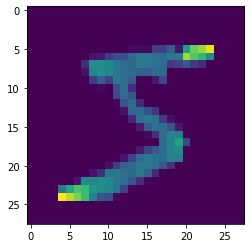

In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras import *
from keras import layers
from keras.layers import *
from keras import Model, optimizers, losses
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

#y_train = tf.keras.utils.normalize(y_train, axis = -1)
#y_test = tf.keras.utils.normalize(y_test, axis = -1)

#x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
#y_train = y_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0

#x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0
#y_test = y_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))


plt.imshow(x_train[0])
plt.show

In [ ]:
def InceptionV2(x, base_channels=32):
  a = Conv2D(base_channels*2, 1, 1, activation='relu')(x)

  b_1 = Conv2D(base_channels*2, 1, 1, activation='relu')(x)
  b_2 = Conv2D(base_channels*4, 3, 1, padding='same', activation='relu')(b_1)

  c_1 = Conv2D(base_channels, 1, 1, activation='relu')(x)
  c_2 = Conv2D(base_channels, 5, 1, padding='same', activation='relu')(c_1)

  d_1 = MaxPooling2D(3, 1, padding='same')(x)
  d_2 = Conv2D(base_channels, 1, 1, activation='relu')(d_1)

  return Concatenate(axis=-1)([a, b_2, c_2, d_2])

inp = Input((28, 28, 1))    #mnist input shape

maps = InceptionV2(inp)

gap = GlobalAveragePooling2D()(maps)

output = Dense(1, activation='sigmoid')(gap)

model = Model(inputs=inp, outputs=output)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy' ,
    metrics=["accuracy"]
)

model.summary()



Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_13 (Conv2D)             (None, 28, 28, 64)   128         ['input_5[0][0]']                
                                                                                                  
 conv2d_15 (Conv2D)             (None, 28, 28, 32)   64          ['input_5[0][0]']                
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 28, 28, 1)   0           ['input_5[0][0]']                
                                                                                            

In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=1, verbose=2)
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

KeyboardInterrupt: ignored